In [71]:
import pandas as pd
import numpy as np
import os
import json
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
%matplotlib inline

In [72]:
# Loading all 4 trained models
saved_objects = 'saved_objects'
xgb_color_names = xgb.XGBRegressor()
xgb_color_names.load_model(os.path.join(saved_objects, "xgb_color_names.json"))

# xgb_rgb = xgb.XGBRegressor()
# xgb_rgb.load_model(os.path.join(saved_objects, "xgb_rgb.json"))

# ann_color_names = load_model(os.path.join(saved_objects, 'ann_color_names.h5'))

# ann_rgb = load_model(os.path.join(saved_objects , 'ann_rgb.h5'))

# Loading thresh and lists
with open (os.path.join(saved_objects, 'final_thresh_xgb_color_names'), 'rb') as fp:
    final_thresh_xgb_color_names = pickle.load(fp)
    
with open (os.path.join(saved_objects, 'final_thresh_xgb_rgb'), 'rb') as fp:
    final_thresh_xgb_rgb = pickle.load(fp)
    
with open (os.path.join(saved_objects, 'final_thresh_ann_color_names'), 'rb') as fp:
    final_thresh_ann_color_names = pickle.load(fp)
    
with open (os.path.join(saved_objects, 'final_thresh_ann_rgb'), 'rb') as fp:
    final_thresh_ann_rgb = pickle.load(fp)
    
with open (os.path.join(saved_objects, 'label_encoder_list'), 'rb') as fp:
    label_encoder_list = pickle.load(fp)
le = LabelEncoder()
le = le.fit(label_encoder_list)

with open (os.path.join(saved_objects, 'final_clothing_label_list'), 'rb') as fp:
    final_clothing_label_list = pickle.load(fp)
le_clothing = LabelEncoder()
le_clothing = le_clothing.fit(final_clothing_label_list)

with open (os.path.join(saved_objects, 'list_of_labels_for_application'), 'rb') as fp:
    list_of_labels_for_application = pickle.load(fp)

In [73]:
final_clothing_label_list

['Shoe',
 'Coat',
 'Dress',
 'Skirt',
 'Tank top',
 'NA',
 'T-shirt',
 'Heels',
 'Shirt',
 'Shorts',
 'Jeans']

In [74]:
label_encoder_list

['gray',
 'orange',
 'whitesmoke',
 'olive',
 'teal',
 'green',
 'firebrick',
 'gainsboro',
 'red',
 'black',
 'darkgray',
 'blue',
 'yellow',
 'lightgray',
 'white',
 'maroon',
 'navy',
 'silver',
 'no color']

In [75]:
color_names_example_dict = {'overall' : 'no color',
                         'up' : 'blue',
                         'down' : 'teal',
                         'foot' : 'teal',
                           'overall_item' : 'NA',
                           'up_item' : 'T-shirt',
                           'down_item' : 'Jeans',
                           'foot_item' : 'Shoe'}
color_name_example_df = pd.DataFrame(color_names_example_dict,
                                    index = [0])
color_name_example_df['overall'] = le.transform(color_name_example_df['overall'])
color_name_example_df['up'] = le.transform(color_name_example_df['up'])
color_name_example_df['down'] = le.transform(color_name_example_df['down'])
color_name_example_df['foot'] = le.transform(color_name_example_df['foot'])

color_name_example_df['overall_item'] = le_clothing.transform(color_name_example_df['overall_item'])
color_name_example_df['up_item'] = le_clothing.transform(color_name_example_df['up_item'])
color_name_example_df['down_item'] = le_clothing.transform(color_name_example_df['down_item'])
color_name_example_df['foot_item'] = le_clothing.transform(color_name_example_df['foot_item'])
color_name_example_df

,overall,up,down,foot,overall_item,up_item,down_item,foot_item
0,10,1,15,15,4,9,3,6


In [66]:
xgb_color_names.predict(color_name_example_df)

array([0.30832687], dtype=float32)

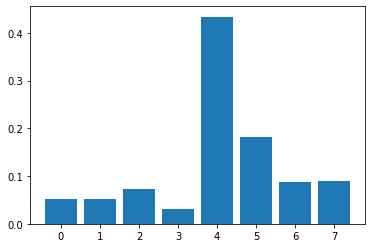

In [67]:
plt.bar(range(len(xgb_color_names.feature_importances_)), xgb_color_names.feature_importances_)
plt.show()

In [121]:
new_data = {
"up_color":[],
"up_clothing_items":[],
"overall_color":[],
"overall_gcs_links":[],
"down_color":[],
"foot_clothing_items":[],
"foot_color":[],
"overall_clothing_items":[],
"password":"asdf",
"username":"new_user",
"foot_gcs_links":[],
"down_gcs_links":[],
"down_clothing_items":[],
"up_gcs_links":[]
}

In [18]:
items_image_links = username_related_data['overall_gcs_links'] + username_related_data['up_gcs_links'] + username_related_data['down_gcs_links'] + username_related_data['foot_gcs_links']
items_image_links = ['https://storage.cloud.google.com/dsci551_storage/' + x for x in items_image_links if type(x) != float]
items_image_links

['https://storage.cloud.google.com/dsci551_storage/test_images/DqhtdIlTH9ixO2O.png',
 'https://storage.cloud.google.com/dsci551_storage/test_images/UZ6LtGu44LhNb4A.png',
 'https://storage.cloud.google.com/dsci551_storage/test_images/H42oj4nOClOYr5l.png',
 'https://storage.cloud.google.com/dsci551_storage/test_images/xLzfqAZe7Sl9Pqi.png']

In [147]:
username_related_data = {'overall_gcs_links': ['.jpg', np.nan],
 'username': 'rohit',
 'down_gcs_links': ['test_images/H42oj4nOClOYr5l.png', np.nan],
 'foot_clothing_items': ['Shoe', np.nan],
 'password': 'asdf',
 'up_color': ['black', 'black'],
 'overall_color': ['black', np.nan],
 'foot_color': ['red', np.nan],
 'foot_gcs_links': ['test_images/xLzfqAZe7Sl9Pqi.png', np.nan],
 'up_gcs_links': ['test_images/DqhtdIlTH9ixO2O.png',
  'test_images/UZ6LtGu44LhNb4A.png'],
 'down_clothing_items': ['Jeans', np.nan],
 'up_clothing_items': ['T-shirt', 'T-shirt'],
 'overall_clothing_items': ['Coat', np.nan],
 'down_color': ['blue', np.nan]}

In [148]:
user_wardrobe_df = pd.DataFrame(username_related_data)
# user_wardrobe_df = pd.DataFrame(new_data)
user_wardrobe_df

,overall_gcs_links,username,down_gcs_links,foot_clothing_items,password,up_color,overall_color,foot_color,foot_gcs_links,up_gcs_links,down_clothing_items,up_clothing_items,overall_clothing_items,down_color
0,.jpg,rohit,test_images/H42oj4nOClOYr5l.png,Shoe,asdf,black,black,red,test_images/xLzfqAZe7Sl9Pqi.png,test_images/DqhtdIlTH9ixO2O.png,Jeans,T-shirt,Coat,blue
1,NaN,rohit,NaN,NaN,asdf,black,NaN,NaN,NaN,test_images/UZ6LtGu44LhNb4A.png,NaN,T-shirt,NaN,NaN


In [149]:
df_for_mixing_and_matching = pd.DataFrame([])
gcs_links_columns = ['overall_gcs_links', 'up_gcs_links', 'down_gcs_links', 'foot_gcs_links']
required_columns_for_model_prediction = ['overall_clothing_items', 'overall_color',
'up_clothing_items', 'up_color',
'down_clothing_items', 'down_color',
'foot_clothing_items', 'foot_color',]
appended_dfs_from_user_related_data = []

for links_col, i in zip(gcs_links_columns, range(0, len(required_columns_for_model_prediction), 2)):
    appended_dfs_from_user_related_data.append(pd.concat([user_wardrobe_df[links_col], user_wardrobe_df[required_columns_for_model_prediction[i]], user_wardrobe_df[required_columns_for_model_prediction[i + 1]]], axis = 1).apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
))
mix_n_match_df = pd.concat([appended_dfs_from_user_related_data[0], appended_dfs_from_user_related_data[1],
          appended_dfs_from_user_related_data[2], appended_dfs_from_user_related_data[3]], axis = 1)
mix_n_match_df.columns = ['overall', 'up', 'down', 'foot']
# mix_n_match_df.replace('', np.nan, inplace = True)
mix_n_match_df

,overall,up,down,foot
0,".jpg,Coat,black","test_images/DqhtdIlTH9ixO2O.png,T-shirt,black","test_images/H42oj4nOClOYr5l.png,Jeans,blue","test_images/xLzfqAZe7Sl9Pqi.png,Shoe,red"
1,,"test_images/UZ6LtGu44LhNb4A.png,T-shirt,black",,


In [150]:
import itertools
permuted_df = pd.DataFrame([e for e in itertools.product(mix_n_match_df.overall, mix_n_match_df.up,
                                          mix_n_match_df.down, mix_n_match_df.foot,)], 
             columns = mix_n_match_df.columns)
permuted_df = permuted_df.drop(index = permuted_df[permuted_df.duplicated()].index)
permuted_df.replace("", np.nan, inplace = True)
permuted_df.dropna(inplace = True)
# permuted_df = permuted_df.applymap(lambda x: 'no link,NA,no color' if x == '' else x)
# permuted_df.fillna(value = 'no link,NA,no color')
permuted_df

,overall,up,down,foot
0,".jpg,Coat,black","test_images/DqhtdIlTH9ixO2O.png,T-shirt,black","test_images/H42oj4nOClOYr5l.png,Jeans,blue","test_images/xLzfqAZe7Sl9Pqi.png,Shoe,red"
4,".jpg,Coat,black","test_images/UZ6LtGu44LhNb4A.png,T-shirt,black","test_images/H42oj4nOClOYr5l.png,Jeans,blue","test_images/xLzfqAZe7Sl9Pqi.png,Shoe,red"


In [153]:
prediction_and_link_df = pd.DataFrame([])
for col in permuted_df.columns:
    temp_df = permuted_df[col].str.split(',', expand=True)
    temp_df.columns = [col + '_gcs_links',
                      col + '_item',
                      col + '_color']
    prediction_and_link_df = pd.concat([prediction_and_link_df, temp_df], axis = 1)

prediction_and_link_df

,overall_gcs_links,overall_item,overall_color,up_gcs_links,up_item,up_color,down_gcs_links,down_item,down_color,foot_gcs_links,foot_item,foot_color
0,.jpg,Coat,black,test_images/DqhtdIlTH9ixO2O.png,T-shirt,black,test_images/H42oj4nOClOYr5l.png,Jeans,blue,test_images/xLzfqAZe7Sl9Pqi.png,Shoe,red
4,.jpg,Coat,black,test_images/UZ6LtGu44LhNb4A.png,T-shirt,black,test_images/H42oj4nOClOYr5l.png,Jeans,blue,test_images/xLzfqAZe7Sl9Pqi.png,Shoe,red


In [152]:
prediction_df = prediction_and_link_df[['overall_color', 'up_color', 'down_color', 'foot_color', 
                        'overall_item', 'up_item', 'down_item', 'foot_item']].copy()
prediction_df['overall_color'] = le.transform(prediction_df['overall_color'])
prediction_df['up_color'] = le.transform(prediction_df['up_color'])
prediction_df['down_color'] = le.transform(prediction_df['down_color'])
prediction_df['foot_color'] = le.transform(prediction_df['foot_color'])

prediction_df['overall_item'] = le_clothing.transform(prediction_df['overall_item'])
prediction_df['up_item'] = le_clothing.transform(prediction_df['up_item'])
prediction_df['down_item'] = le_clothing.transform(prediction_df['down_item'])
prediction_df['foot_item'] = le_clothing.transform(prediction_df['foot_item'])
prediction_df

,overall_color,up_color,down_color,foot_color,overall_item,up_item,down_item,foot_item
0,0,0,1,13,0,9,3,6
4,0,0,1,13,0,9,3,6


In [132]:
pd.DataFrame(xgb_color_names.predict(prediction_df)).sort_values(0).index[-3 : ]

Int64Index([7, 1, 5], dtype='int64')

In [133]:
gcs_links_df = prediction_and_link_df[gcs_links_columns]
gcs_links_df

,overall_gcs_links,up_gcs_links,down_gcs_links,foot_gcs_links
0,no link,test_images/DqhtdIlTH9ixO2O.png,test_images/H42oj4nOClOYr5l.png,test_images/xLzfqAZe7Sl9Pqi.png
1,no link,test_images/DqhtdIlTH9ixO2O.png,test_images/H42oj4nOClOYr5l.png,no link
2,no link,test_images/DqhtdIlTH9ixO2O.png,no link,test_images/xLzfqAZe7Sl9Pqi.png
3,no link,test_images/DqhtdIlTH9ixO2O.png,no link,no link
4,no link,test_images/UZ6LtGu44LhNb4A.png,test_images/H42oj4nOClOYr5l.png,test_images/xLzfqAZe7Sl9Pqi.png
5,no link,test_images/UZ6LtGu44LhNb4A.png,test_images/H42oj4nOClOYr5l.png,no link
6,no link,test_images/UZ6LtGu44LhNb4A.png,no link,test_images/xLzfqAZe7Sl9Pqi.png
7,no link,test_images/UZ6LtGu44LhNb4A.png,no link,no link


In [135]:
pd.DataFrame(xgb_color_names.predict(prediction_df)).sort_values(0).index[-3 : ]

7